# PRONTO Dataset

PRONTO is Multiphase FLow facility industrial dataset containing 31 variables corresponding to various sensors and valves of plant

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("S:/ABB/Resource/PRONTO/PRONTO benchmark case study/CSVs/1_0912Testday4.csv")
df.head()

,Start Time,09/12/2017 10:00,End Time,9/12/2017 14:00:00 PM,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,...,FIC302/PID1/PV.CV,FIC301/PID1/OUT.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/OUT.CV,FIC102/PID1/SP.CV,FIC102/PID1/PV.CV,FIC101/PID1/OUT.CV,FIC101/PID1/SP.CV,FIC101/PID1/PV.CV
1,TIMESTAMP,Air In1,Air In2,Air T,Air P,Water In1,Water In2,Water T,Water Density,Mixture zone P,...,NaN,NaN,Air In 2,Air In 2,Water In1,Water In1,NaN,Water In 2,Water In 2,NaN
2,09/12/2017 10:00,99.7911377,0.002018351,16.46453094,1.157050967,0.00014997,0.008798941,18.75638962,998.2576294,1.131950021,...,99.69100189,0,100.0009995,0.002018351,0,0,0.00014997,0,0,0.00879894
3,09/12/2017 10:00,99.84359741,0.00171826,16.46552086,1.157019019,0.000150975,0.008799082,18.75638962,998.2578125,1.131800056,...,99.74504089,0,100.0009995,0.00171826,0,0,0.000150975,0,0,0.00879908
4,09/12/2017 10:00,99.84837341,0.001418168,16.46649933,1.156985998,0.000151979,0.008799221,18.51082993,998.2579956,1.131649971,...,99.79908752,0,100.0009995,0.001418168,0,0,0.000151979,0,0,0.00879922


# Preprocessing

In [3]:
# Aligning the varible with proper labels and cnveritng to float
def prepare_df(df):
    columns = df.iloc[0]
    columns[0] = 'TIMESTAMP'
    df = df.drop([0,1],axis=0)
    df.columns = columns
    for i in df.columns[1:]:
        df[i] = df[i].astype('float')
    return df

In [4]:
#Dropping 'TIMESTAMP' for Calculation
df = prepare_df(df)
df = df.drop(['TIMESTAMP'],axis=1)
df.head()

,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,PT408/OUT.CV,...,FIC302/PID1/PV.CV,FIC301/PID1/OUT.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/OUT.CV,FIC102/PID1/SP.CV,FIC102/PID1/PV.CV,FIC101/PID1/OUT.CV,FIC101/PID1/SP.CV,FIC101/PID1/PV.CV
2,99.791138,0.002018,16.464531,1.157051,0.000150,0.008799,18.75639,998.257629,1.131950,0.99217,...,99.691002,0.0,100.001,0.002018,0.0,0.0,0.000150,0.0,0.0,0.008799
3,99.843597,0.001718,16.465521,1.157019,0.000151,0.008799,18.75639,998.257812,1.131800,0.99217,...,99.745041,0.0,100.001,0.001718,0.0,0.0,0.000151,0.0,0.0,0.008799
4,99.848373,0.001418,16.466499,1.156986,0.000152,0.008799,18.51083,998.257996,1.131650,0.99217,...,99.799088,0.0,100.001,0.001418,0.0,0.0,0.000152,0.0,0.0,0.008799
5,99.824516,0.001118,16.467489,1.156954,0.000153,0.008799,18.51083,998.258179,1.131646,0.99217,...,99.853127,0.0,100.001,0.001118,0.0,0.0,0.000153,0.0,0.0,0.008799
6,99.772057,4.008060,16.468470,1.156922,0.000154,0.008800,18.51083,998.258301,1.131642,0.99217,...,99.797951,0.0,100.001,4.008060,0.0,0.0,0.000154,0.0,0.0,0.008800


# Multidimensional Matrix Profile

In [5]:
m = 500 
mps,ind = stumpy.mstump(df,m)

C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))


In [6]:
#Finding motif indices
n_idx = 1 #Selecting minimum value to identify primary motif
motifs_idx = np.argsort(mps, axis=1)[:, :n_idx]

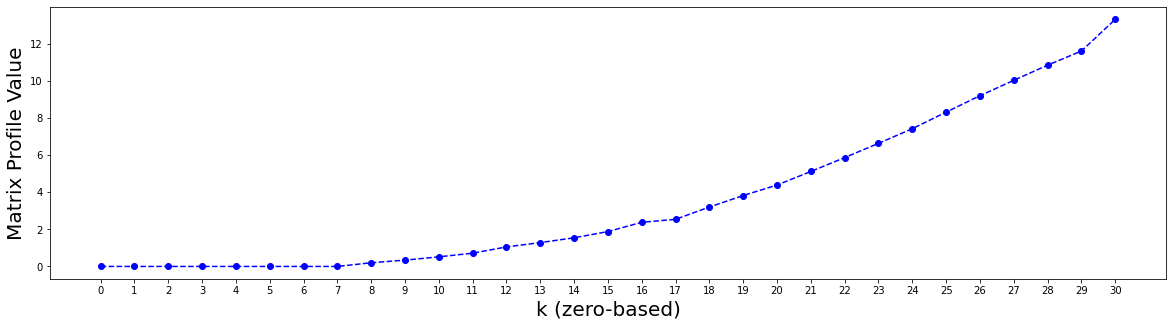

In [7]:
# Elbow Curve
f,ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(mps[range(mps.shape[0]), motifs_idx[:, 0]],'--bo')#, c='red', linewidth='4')
ax.set_xlabel('k (zero-based)', fontsize='20')
ax.set_ylabel('Matrix Profile Value', fontsize='20')
ax.set_xticks(range(mps.shape[0]))
ax.set_xticklabels(range(mps.shape[0]))
plt.show()

In [8]:
# 'k' variable from all 'd' variable
k = 8
S = stumpy.subspace(df, m, motifs_idx[k-1][0], ind[k-1][motifs_idx[k-1][0]], k-1)
print(f"For k = {k-1}, the {k}-dimensional subspace includes subsequences from variables/columns: {S}")

For k = 7, the 8-dimensional subspace includes subsequences from variables/columns: [12 17 20 22 23 25 29  7]


C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))


#### Plotting the motifs
Highlighted in Red are motifs <br>
Final Graph in the plot is k-dimensional Matrix Profile <br>
Black dashed lines point towards the point corresponding to motif in k-dimensional Matrix Profile <br>

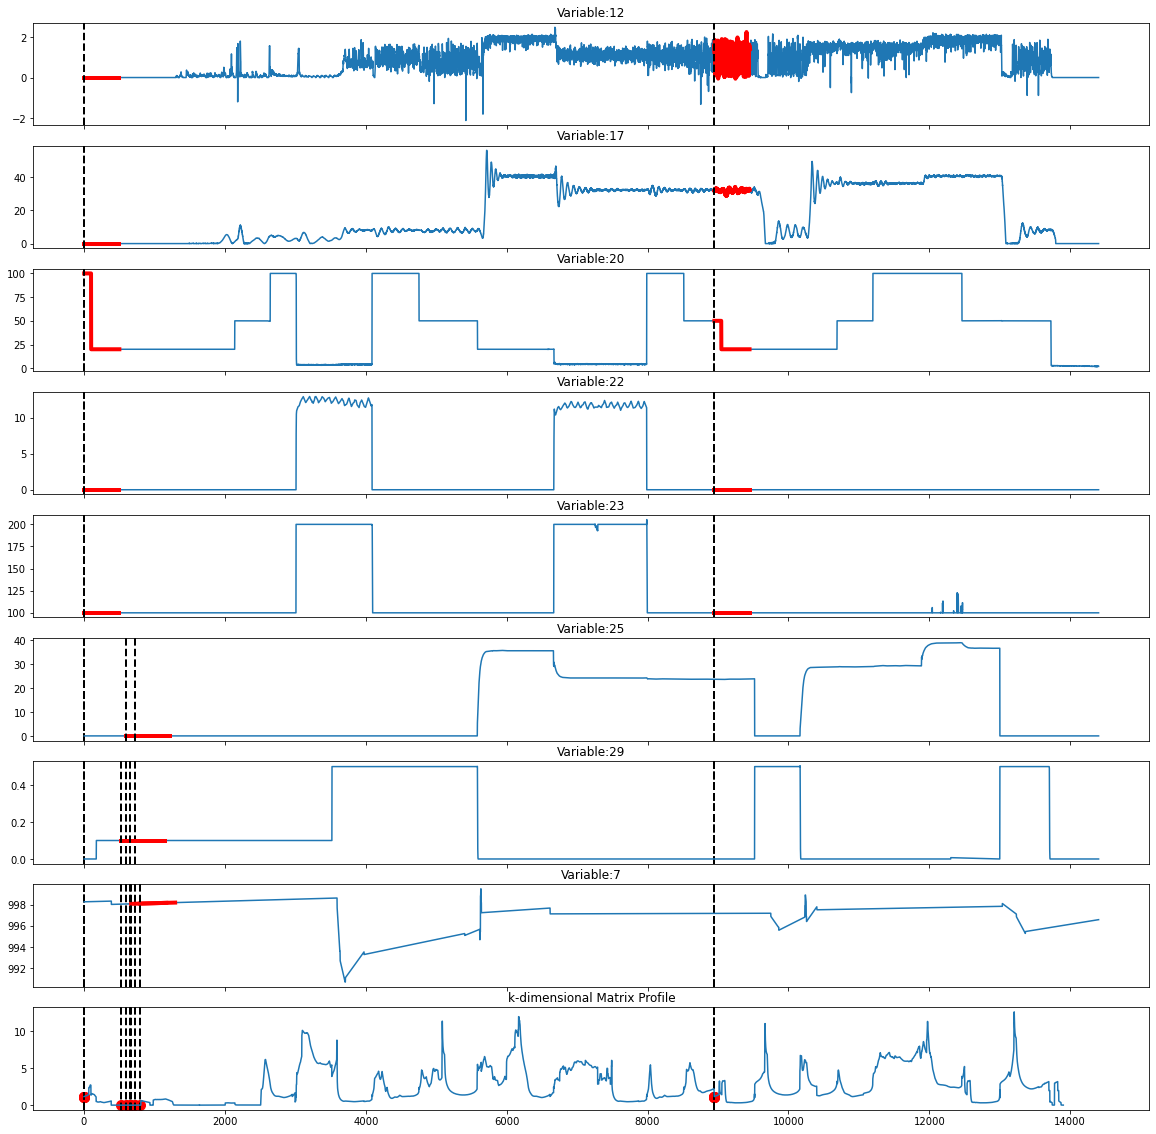

In [9]:
f,ax = plt.subplots(k+1,1,figsize=(20,20),sharex=True)
for i in range(k):
    tmp = df[df.columns[S[i]]]
    ax[i].plot(tmp)
    ax[i].set_title("Variable:{}".format(S[i]))#df.columns[S[i]] + " : " +str(S[i]+1))
    for j in range(n_idx):
        idx = motifs_idx[i][j]
        ix = ind[k][idx]
        ax[i].plot(tmp[idx:idx+m],c='r',linewidth=4)
        ax[i].plot(tmp[ix:ix+m],c='r',linewidth=4)
        for ik in range(i,k+1):
            ax[ik].axvline(x=idx,linestyle='dashed',c='k',linewidth=2)
            ax[ik].axvline(x=ix,linestyle='dashed',c='k',linewidth=2)
ax[k].plot(mps[k-1])
ax[k].set_title('k-dimensional Matrix Profile')
for i in range(k):
    for j in range(n_idx):
        idx = motifs_idx[i][j]
        ix = ind[k][idx]
        ax[k].scatter(idx,mps[k-1][idx],c='r',s=100)
        ax[k].scatter(ix,mps[k-1][idx],c='r',s=100)

# Results on subset of the variables

In [10]:
k_dim =  10#Selecting first 10 columns
df1 = df[df.columns[:k_dim]]  

In [11]:
m = 500 
mps1,ind1 = stumpy.mstump(df1,m)

In [12]:
#Finding motif indices
n_idx = 1
motifs_idx1 = np.argsort(mps1, axis=1)[:, :n_idx]

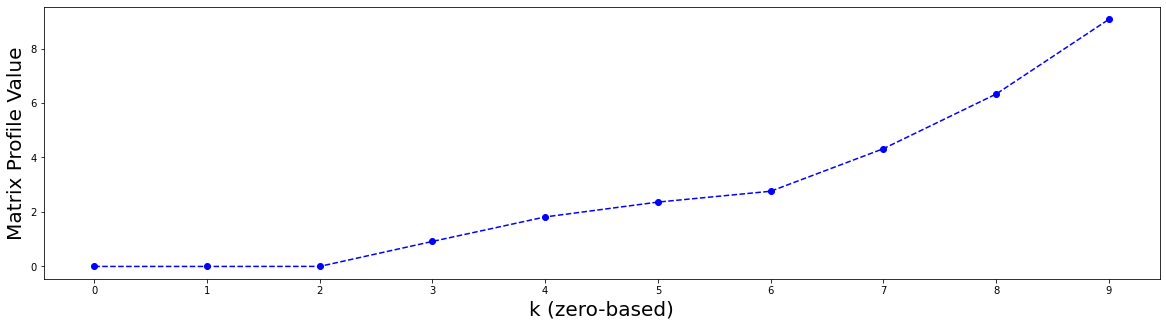

In [13]:
# Elbow Curve
f,ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(mps1[range(mps1.shape[0]), motifs_idx1[:, 0]],'--bo')#, c='red', linewidth='4')
ax.set_xlabel('k (zero-based)', fontsize='20')
ax.set_ylabel('Matrix Profile Value', fontsize='20')
ax.set_xticks(range(mps1.shape[0]))
ax.set_xticklabels(range(mps1.shape[0]))
plt.show()

In [22]:
# 'k' variable from all 'd' variable
k = 3
S = stumpy.subspace(df1, m, motifs_idx1[k-1][0], ind1[k-1][motifs_idx1[k-1][0]], k-1)
print(f"For k = {k-1}, the {k}-dimensional subspace includes subsequences from variables/columns: {S}")

For k = 2, the 3-dimensional subspace includes subsequences from variables/columns: [5 2 7]


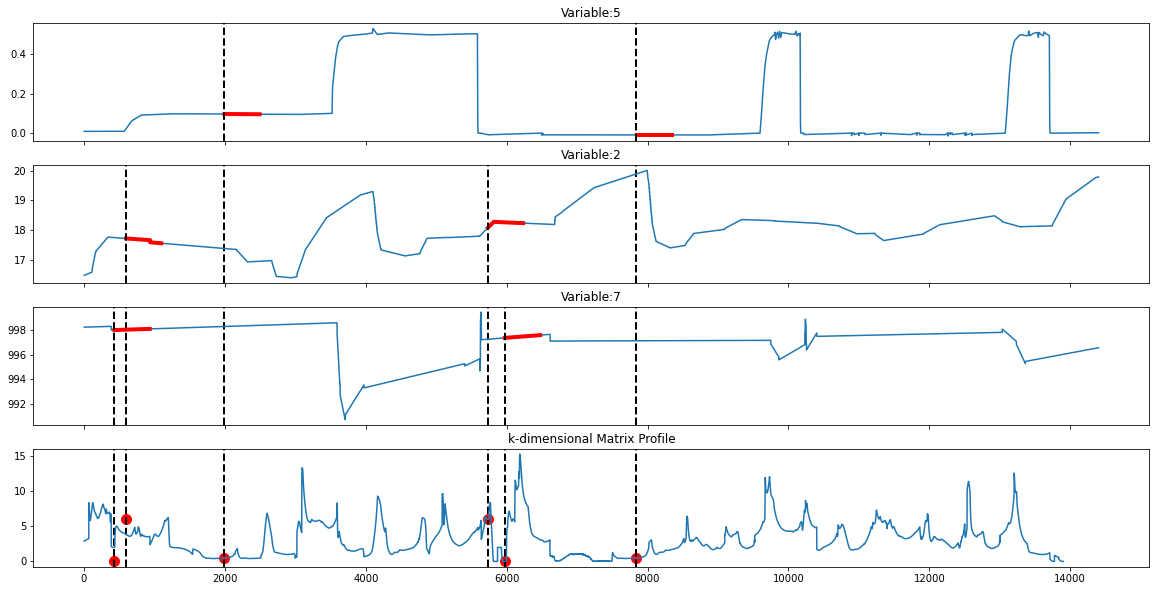

In [25]:
f,ax = plt.subplots(k+1,1,figsize=(20,10),sharex=True)
for i in range(k):
    tmp = df1[df1.columns[S[i]]]
    ax[i].plot(tmp)
    ax[i].set_title("Variable:{}".format(S[i]))#df.columns[S[i]] + " : " +str(S[i]+1))
    for j in range(n_idx):
        idx = motifs_idx1[i][j]
        ix = ind1[k][idx]
        ax[i].plot(tmp[idx:idx+m],c='r',linewidth=4)
        ax[i].plot(tmp[ix:ix+m],c='r',linewidth=4)
        for ik in range(i,k+1):
            ax[ik].axvline(x=idx,linestyle='dashed',c='k',linewidth=2)
            ax[ik].axvline(x=ix,linestyle='dashed',c='k',linewidth=2)
ax[k].plot(mps1[k-1])
ax[k].set_title('k-dimensional Matrix Profile')
for i in range(k):
    for j in range(n_idx):
        idx = motifs_idx1[i][j]
        ix = ind1[k][idx]
        ax[k].scatter(idx,mps1[k-1][idx],c='r',s=100)
        ax[k].scatter(ix,mps1[k-1][idx],c='r',s=100)

#### Taking another subset (Avoiding variables with flat surfaces)

In [16]:
column_idxs = [2,3,6,7,8,9,14,15,16,18]
df2 = df[df.columns[column_idxs]]

In [17]:
m = 500 
mps2,ind2 = stumpy.mstump(df2,m)

In [18]:
#Finding motif indices
n_idx = 1
motifs_idx2 = np.argsort(mps2, axis=1)[:, :n_idx]

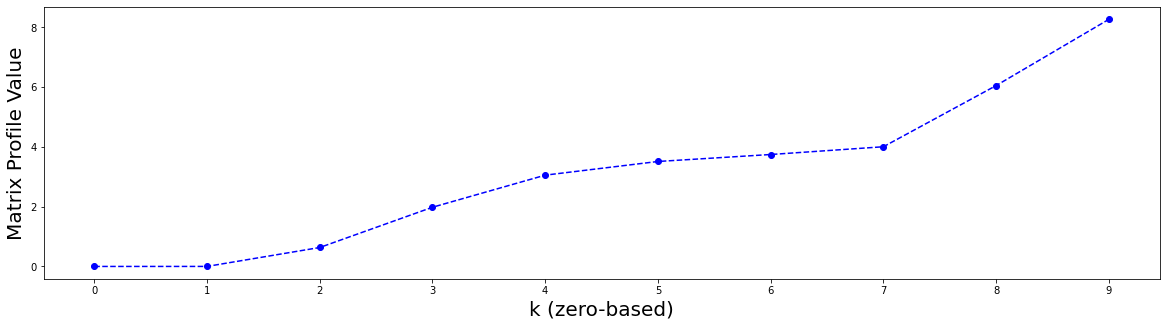

In [19]:
# Elbow Curve
f,ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(mps2[range(mps2.shape[0]), motifs_idx2[:, 0]],'--bo')#, c='red', linewidth='4')
ax.set_xlabel('k (zero-based)', fontsize='20')
ax.set_ylabel('Matrix Profile Value', fontsize='20')
ax.set_xticks(range(mps2.shape[0]))
ax.set_xticklabels(range(mps2.shape[0]))
plt.show()

In [20]:
# 'k' variable from all 'd' variable
k = 2
S = stumpy.subspace(df2, m, motifs_idx2[k-1][0], ind2[k-1][motifs_idx2[k-1][0]], k-1)
print(f"For k = {k-1}, the {k}-dimensional subspace includes subsequences from variables/columns: {S}")

For k = 1, the 2-dimensional subspace includes subsequences from variables/columns: [0 3]


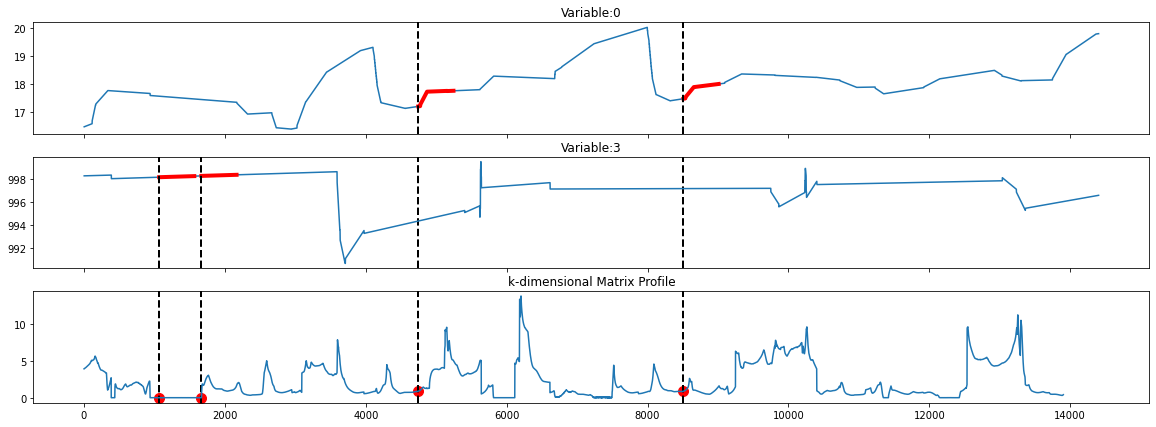

In [21]:
f,ax = plt.subplots(k+1,1,figsize=(20,7),sharex=True)
for i in range(k):
    tmp = df2[df2.columns[S[i]]]
    ax[i].plot(tmp)
    ax[i].set_title("Variable:{}".format(S[i]))#df.columns[S[i]] + " : " +str(S[i]+1))
    for j in range(n_idx):
        idx = motifs_idx2[i][j]
        ix = ind2[k][idx]
        ax[i].plot(tmp[idx:idx+m],c='r',linewidth=4)
        ax[i].plot(tmp[ix:ix+m],c='r',linewidth=4)
        for ik in range(i,k+1):
            ax[ik].axvline(x=idx,linestyle='dashed',c='k',linewidth=2)
            ax[ik].axvline(x=ix,linestyle='dashed',c='k',linewidth=2)
ax[k].plot(mps2[k-1])
ax[k].set_title('k-dimensional Matrix Profile')
for i in range(k):
    for j in range(n_idx):
        idx = motifs_idx2[i][j]
        ix = ind2[k][idx]
        ax[k].scatter(idx,mps2[k-1][idx],c='r',s=100)
        ax[k].scatter(ix,mps2[k-1][idx],c='r',s=100)